In [1]:
import numpy as np
import matplotlib.pyplot as plt
### From stackoverflow, to make imshow subplot with individuals colorbars
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm
from matplotlib.ticker import MultipleLocator
####

band1 = np.loadtxt("band1.txt")
band2 = np.loadtxt("band2.txt")
from matplotlib.pyplot import figure
figure(num=None, figsize=(15, 8), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(10*np.log(band2),vmin=-40,vmax=0)
plt.colorbar()
plt.show()





/usr/local/insa/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


<Figure size 1200x640 with 2 Axes>

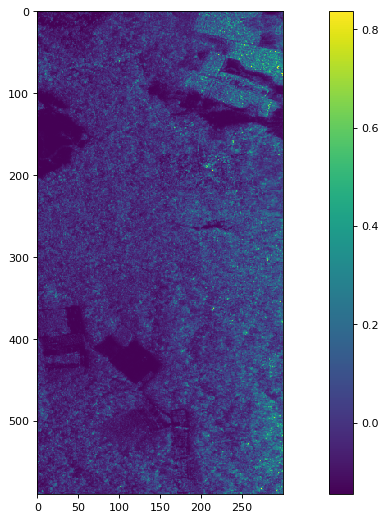

In [35]:
figure(num=None, figsize=(15, 8), dpi=80, facecolor='w', edgecolor='k')
original = band2[10:600,700:1000]
plt.imshow(original)
template = original[175:220,150:250]
plt.colorbar()
plt.show()

In [36]:
from scipy import signal
from scipy import misc

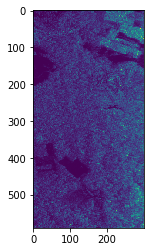

In [37]:
original -= original.mean()
template -= template.mean()

plt.imshow(original)
plt.show()
#original = original + np.random.randn(*face.shape) * 50  # add noise

In [ ]:
corr = signal.correlate2d(original, template, boundary='symm', mode='same')
y, x = np.unravel_index(np.argmax(corr), corr.shape)  # find the match


/usr/local/insa/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


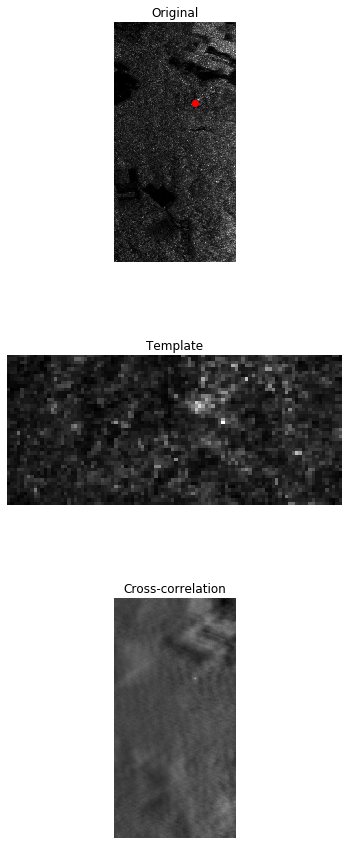

In [32]:
import matplotlib.pyplot as plt
fig, (ax_orig, ax_template, ax_corr) = plt.subplots(3, 1,figsize=(6, 15))
ax_orig.imshow(original, cmap='gray')
ax_orig.set_title('Original')
ax_orig.set_axis_off()
ax_template.imshow(template, cmap='gray')
ax_template.set_title('Template')
ax_template.set_axis_off()
ax_corr.imshow(corr, cmap='gray')
ax_corr.set_title('Cross-correlation')
ax_corr.set_axis_off()
ax_orig.plot(x, y, 'ro')
fig.show()

In [23]:
from scipy import signal
from scipy import misc
face = misc.face(gray=True) - misc.face(gray=True).mean()
template = np.copy(face[300:365, 670:750])  # right eye
template -= template.mean()
face = face + np.random.randn(*face.shape) * 50  # add noise
corr = signal.correlate2d(face, template, boundary='symm', mode='same')
y, x = np.unravel_index(np.argmax(corr), corr.shape)  # find the match


/usr/local/insa/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


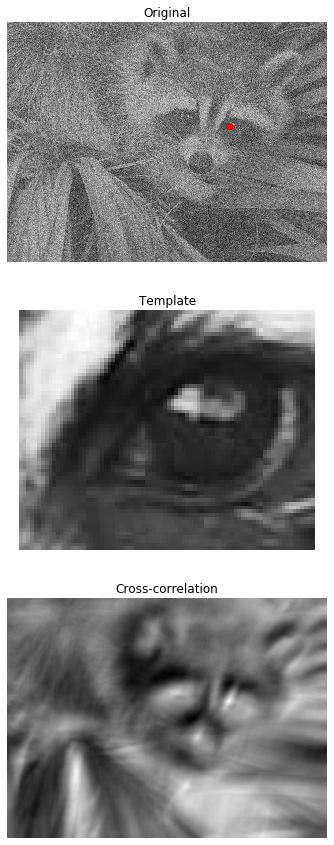

In [24]:
import matplotlib.pyplot as plt
fig, (ax_orig, ax_template, ax_corr) = plt.subplots(3, 1,
                                                    figsize=(6, 15))
ax_orig.imshow(face, cmap='gray')
ax_orig.set_title('Original')
ax_orig.set_axis_off()
ax_template.imshow(template, cmap='gray')
ax_template.set_title('Template')
ax_template.set_axis_off()
ax_corr.imshow(corr, cmap='gray')
ax_corr.set_title('Cross-correlation')
ax_corr.set_axis_off()
ax_orig.plot(x, y, 'ro')
fig.show()
